In [1]:
import numpy as np
import pickle
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Import necessary items from tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, UpSampling2D
from tensorflow.keras.layers import Conv2DTranspose, Conv2D, MaxPooling2D, Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load training images
data = pickle.load(open("drive/MyDrive/bda_data/data.p", "rb" ))

# Load image labels
y = pickle.load(open("drive/MyDrive/bda_data/labels.p", "rb" ))

In [4]:
print("Train Images shape:", data[0].shape)
print("Train Images label shape:", y[0].shape)

Train Images shape: (80, 160, 3)
Train Images label shape: (80, 160, 1)


In [5]:
print("Train Images label shape:", y[0])

Train Images label shape: [[[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 ...

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]

 [[0]
  [0]
  [0]
  ...
  [0]
  [0]
  [0]]]


In [6]:
train_images = np.array(data)
labels = np.array(y)

In [7]:
labels = labels/255 #normalize the labels and data
X_dev, X_test, y_dev, y_test = train_test_split(train_images, labels, test_size=0.1, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.1, shuffle=True)

In [8]:
batch_size = 128
pool_size = (2, 2)
input_shape = X_train.shape[1:]

In [9]:
model = Sequential()
model.add(BatchNormalization(input_shape=input_shape))
model.add(Conv2D(8, (3, 3), padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(16, (3, 3), padding='valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Conv2D(32, (3, 3), padding='valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(32, (3, 3), padding='valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Conv2D(64, (3, 3), padding='valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2DTranspose(64, (3, 3), padding='valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(UpSampling2D(size=pool_size))
model.add(Conv2DTranspose(32, (3, 3), padding='valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2DTranspose(32, (3, 3), padding='valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(UpSampling2D(size=pool_size))
model.add(Conv2DTranspose(16, (3, 3), padding='valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2DTranspose(1, (3, 3), padding='valid', activation = 'relu'))
# # model.add(tf.keras.layers.Flatten())
# # model.add(Dense(1))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 80, 160, 3)       12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 78, 158, 8)        224       
                                                                 
 batch_normalization_1 (Batc  (None, 78, 158, 8)       32        
 hNormalization)                                                 
                                                                 
 conv2d_1 (Conv2D)           (None, 76, 156, 16)       1168      
                                                                 
 batch_normalization_2 (Batc  (None, 76, 156, 16)      64        
 hNormalization)                                                 
                                                        

In [11]:
# train

model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['accuracy'])

model_metric = model.fit(X_train,
         y_train,
         batch_size=128,
         epochs=25,
         validation_data=(X_val, y_val))

Epoch 1/25
81/81 [==============================] - 34s 222ms/step - loss: 0.2899 - accuracy: 0.7571 - val_loss: 0.1169 - val_accuracy: 0.8284
Epoch 2/25
81/81 [==============================] - 14s 173ms/step - loss: 0.0746 - accuracy: 0.8848 - val_loss: 0.1158 - val_accuracy: 0.8341
Epoch 3/25
81/81 [==============================] - 14s 175ms/step - loss: 0.0467 - accuracy: 0.9197 - val_loss: 0.1171 - val_accuracy: 0.8512
Epoch 4/25
81/81 [==============================] - 14s 176ms/step - loss: 0.0338 - accuracy: 0.9369 - val_loss: 0.1127 - val_accuracy: 0.8597
Epoch 5/25
81/81 [==============================] - 14s 174ms/step - loss: 0.0274 - accuracy: 0.9444 - val_loss: 0.1021 - val_accuracy: 0.8707
Epoch 6/25
81/81 [==============================] - 14s 174ms/step - loss: 0.0236 - accuracy: 0.9480 - val_loss: 0.1027 - val_accuracy: 0.8710
Epoch 7/25
81/81 [==============================] - 14s 173ms/step - loss: 0.0213 - accuracy: 0.9499 - val_loss: 0.0940 - val_accuracy: 0.8782

In [12]:
import pandas as pd
df = pd.DataFrame(model_metric.history)

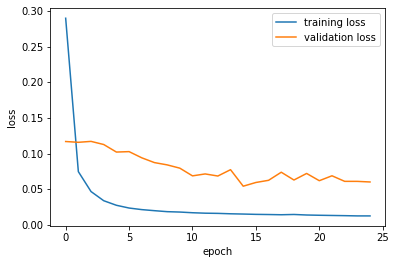

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots();
ax.plot(df.index, df['loss'], label='training loss');
ax.plot(df.index, df['val_loss'], label='validation loss');
ax.set_xlabel('epoch');
ax.set_ylabel('loss');
plt.legend()

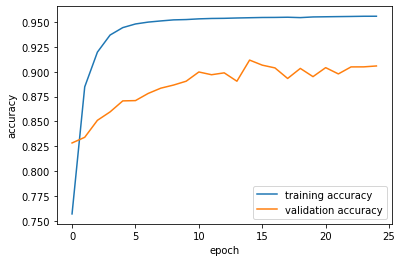

In [14]:
fig, ax = plt.subplots();
ax.plot(df.index, df['accuracy'], label='training accuracy');
ax.plot(df.index, df['val_accuracy'], label='validation accuracy');
ax.set_xlabel('epoch');
ax.set_ylabel('accuracy');
plt.legend()


In [15]:
# evaluate on test set
score_test = model.evaluate(X_test, y_test)
print("Accuracy on the trained model", score_test[1])
print('Loss on the trained model', score_test[0])

40/40 [==============================] - 1s 20ms/step - loss: 0.0597 - accuracy: 0.9063
Accuracy on the trained model 0.9062879681587219
Loss on the trained model 0.05972643196582794


In [16]:
model.save('drive/MyDrive/bda_data/lane_model.h5')

In [17]:
lane_fit_frame = []
lane_fit_average = []

def video_lane(img):
  w = data[0].shape[0]
  h = data[0].shape[1]
  img1 = cv2.resize(img,(h,w))
  img1 = np.array(img1)
  img1 = img1[None,:,:,:]
  cv2.imwrite("drive/MyDrive/bda_data/img1.jpg",img1)
  sample = model.predict(img1)[0]
  cv2.imwrite("drive/MyDrive/bda_data/lane_sample.jpg",sample)
  out_image = sample * 255
  lane_fit_frame.append(out_image)
  lane_fit_average = np.mean(np.array([i for i in lane_fit_frame]),axis = 0)
  pad = np.zeros_like(lane_fit_average).astype(np.uint8)
  lane_lines = np.dstack((pad,lane_fit_average,pad))
  w1 = img.shape[0]
  h1 = img.shape[1]
  lane_image = cv2.resize(lane_lines, (h1,w1))
  cv2.imwrite("drive/MyDrive/bda_data/lane.jpg",lane_image)
  cv2.imwrite("drive/MyDrive/bda_data/img.jpg",img)
  result = cv2.addWeighted(img,1,lane_image,1,0, dtype = cv2.CV_32F)
  return result


In [18]:
from moviepy.editor import VideoFileClip
from tensorflow.keras.models import load_model
import cv2

lane_model = load_model('drive/MyDrive/bda_data/lane_model.h5')
clip = VideoFileClip('drive/MyDrive/bda_data/input_video.mp4')
out_v = clip.fl_image(video_lane)
out_v.write_videofile('drive/MyDrive/bda_data/output_video.mp4', audio=False)

[MoviePy] >>>> Building video drive/MyDrive/bda_data/output_video.mp4
[MoviePy] Writing video drive/MyDrive/bda_data/output_video.mp4


100%|██████████| 251/251 [00:42<00:00,  5.97it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: drive/MyDrive/bda_data/output_video.mp4 

